In [5]:
import json
import pyshark
import nest_asyncio
from ast import literal_eval as make_tuple
import statistics
import matplotlib.pyplot as plt
import numpy as np
nest_asyncio.apply()

In [6]:
def read_json_to_dict(filename):
    connections = {}
    with open(filename) as file:
        connections = json.load(file)

    return connections

In [7]:
def number_packets_including_syn(connections):
    count_with_syn = 0
    for v in connections.values():
        count_with_syn += len([packet for packet in v if packet.split(",")[3] == 'syn'])
    return count_with_syn

In [8]:
filename = "tcp-processed-data-per-client.json"
connections = read_json_to_dict(filename)
packets_number_per_connection = sorted([len(v) for v in connections.values()])

number of communications: 1473347
number of syn packets overall: 1502079
ratio of connections using syn and overall connections: 1.0195011765727966
number of packets per connection median: 1


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



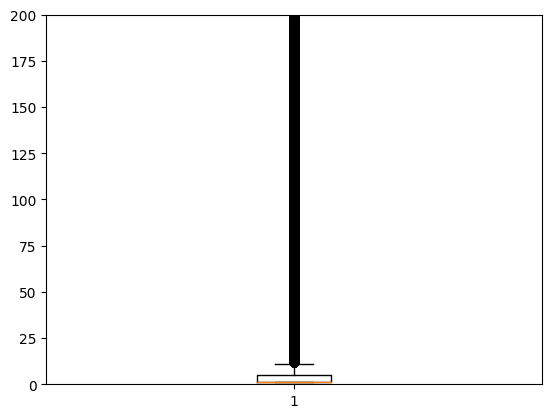

In [10]:
print(f"number of communications: {len(connections.keys())}")
print(f"number of syn packets overall: {number_packets_including_syn(connections)}")
print(f"ratio of connections using syn and overall connections: {number_packets_including_syn(connections) / len(connections.keys())}")
print(f"number of packets per connection median: {statistics.median(packets_number_per_connection)}")
print(f"number of packets per connection mean: {statistics.mean(packets_number_per_connection)}")
print(f"number of packets overall: {sum(packets_number_per_connection)}")
print(f"sniffing time: {6578.2} seconds, {6578.2 / 60} minutes")
print(f"number of packets per connection: {packets_number_per_connection}")
plt.boxplot(packets_number_per_connection)
plt.ylim(0,200)
plt.show()

In [14]:
tuple(sorted(("3", "2")))

('2', '3')

In [ ]:
four_tuples = []
for k in connections.keys():
    four_tuples += [make_tuple(k)[0][0], make_tuple(k)[0][1], make_tuple(k)[1][0], make_tuple(k)[1][1]]

print(len(four_tuples))
four_tuples = sorted(list(set(four_tuples)))
print(len(four_tuples))
for t in four_tuples:
    print(t)
four_tuples[0]


# print(len(set(four_tuples)))
# print(set(four_tuples))
# print(('192.168.3.135-59561', '173.194.76.100-443') in four_tuples)